In [ ]:
pip install --upgrade scikit-learn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 23.8 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.3.2
    Uninstalling scikit-learn-1.3.2:
      Successfully uninstalled scikit-learn-1.3.2


In [ ]:
import numpy as np
import pandas as pd
import datetime as dt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/Prices for Food Crops.csv')

In [ ]:
df.head()

,Unnamed: 0,Produce_Variety,Commodity_Type,Unit,Volume_in_Kgs,Values_in_Ksh,Date,produce_variety,Type_of_Commodity,Package_Type,package_weight(Kg),Day,Month,Year,Price
0,0,Horticulture,Cabbages,Ext Bag,126,KES2205.00,01/01/2012,1,5,2,126,1,1,2012,2205.0
1,1,Horticulture,Cooking Bananas,Med Bunch,22,KES511.00,01/01/2012,1,11,4,22,1,1,2012,511.0
2,2,Horticulture,Ripe Bananas,Med Bunch,14,KES616.00,01/01/2012,1,34,4,14,1,1,2012,616.0
3,3,Horticulture,Carrots,Ext Bag,138,KES2833.00,01/01/2012,1,7,2,138,1,1,2012,2833.0
4,4,Horticulture,Tomatoes,Lg Box,64,KES3411.00,01/01/2012,1,38,3,64,1,1,2012,3411.0


In [ ]:
df.drop(columns=['Unnamed: 0'], inplace=True)
df.drop(columns=['Values_in_Ksh'], inplace=True)
df.drop(columns=['Type_of_Commodity'], inplace=True)
df.drop(columns=['produce_variety'], inplace=True)
df.drop(columns=['Volume_in_Kgs'], inplace=True)
df.drop(columns=['Package_Type'], inplace=True)

#  creating a new dataframe from the columns of df with just columns with 'commodity type' and 'product variety'
#df_new = df[['Commodity_Type', '']].copy()
#df.drop(columns=['Commodity_Type', 'Produce_Variety'], inplace=True)

df.head()

,Produce_Variety,Commodity_Type,Unit,Date,package_weight(Kg),Day,Month,Year,Price
0,Horticulture,Cabbages,Ext Bag,01/01/2012,126,1,1,2012,2205.0
1,Horticulture,Cooking Bananas,Med Bunch,01/01/2012,22,1,1,2012,511.0
2,Horticulture,Ripe Bananas,Med Bunch,01/01/2012,14,1,1,2012,616.0
3,Horticulture,Carrots,Ext Bag,01/01/2012,138,1,1,2012,2833.0
4,Horticulture,Tomatoes,Lg Box,01/01/2012,64,1,1,2012,3411.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1145 entries, 0 to 1144
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Produce_Variety     1145 non-null   object 
 1   Commodity_Type      1145 non-null   object 
 2   Unit                1145 non-null   object 
 3   Date                1145 non-null   object 
 4   package_weight(Kg)  1145 non-null   int64  
 5   Day                 1145 non-null   int64  
 6   Month               1145 non-null   int64  
 7   Year                1145 non-null   int64  
 8   Price               1145 non-null   float64
dtypes: float64(1), int64(4), object(4)
memory usage: 80.6+ KB


In [ ]:
df.describe()

,package_weight(Kg),Day,Month,Year,Price
count,1145.000000,1145.000000,1145.000000,1145.000000,1145.000000
mean,73.370306,2.886463,6.148472,2013.417467,3188.371829
std,36.564162,6.461643,3.401301,1.176864,2376.371660
min,13.000000,1.000000,1.000000,2012.000000,443.000000
25%,50.000000,1.000000,3.000000,2013.000000,1720.000000
50%,90.000000,1.000000,6.000000,2013.000000,2610.000000
75%,95.000000,1.000000,9.000000,2015.000000,3776.000000
max,142.000000,25.000000,12.000000,2015.000000,13713.000000


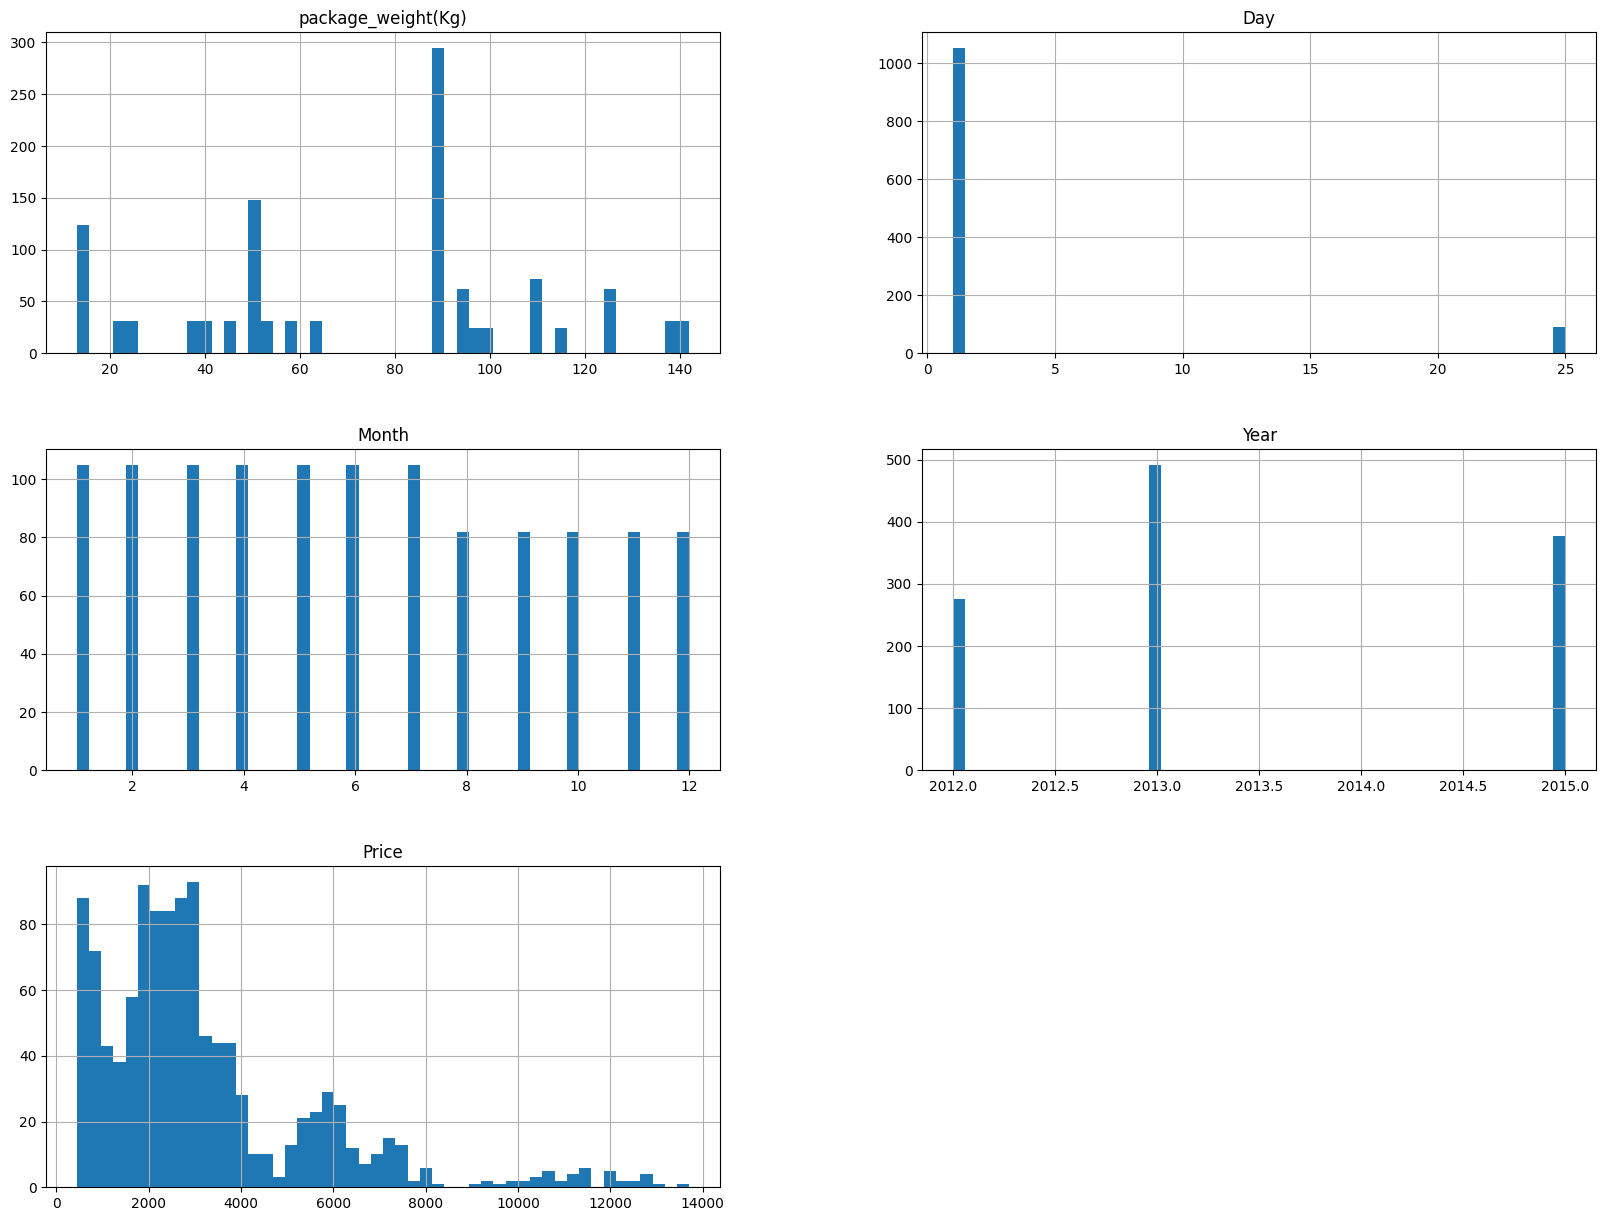

In [ ]:
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))
plt.show()


In [ ]:
df

,Produce_Variety,Commodity_Type,Unit,Date,package_weight(Kg),Day,Month,Year,Price
0,Horticulture,Cabbages,Ext Bag,01/01/2012,126,1,1,2012,2205.0
1,Horticulture,Cooking Bananas,Med Bunch,01/01/2012,22,1,1,2012,511.0
2,Horticulture,Ripe Bananas,Med Bunch,01/01/2012,14,1,1,2012,616.0
3,Horticulture,Carrots,Ext Bag,01/01/2012,138,1,1,2012,2833.0
4,Horticulture,Tomatoes,Lg Box,01/01/2012,64,1,1,2012,3411.0
...,...,...,...,...,...,...,...,...,...
1140,Legumes,Groundnuts,Bag,12/25/2015,110,25,12,2015,12986.0
1141,Roots & Tubers,Red Irish Potatoes,Bag,12/25/2015,110,25,12,2015,2805.0
1142,Roots & Tubers,White Irish Potatoes,Bag,12/25/2015,110,25,12,2015,2885.0
1143,Roots & Tubers,Cassava Fresh,Bag,12/25/2015,99,25,12,2015,2097.0


Encode categorical variables

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

In [ ]:
df                ##encoded

,Produce_Variety,Commodity_Type,Unit,Date,package_weight(Kg),Day,Month,Year,Price
0,1,5,2,0,126,1,1,2012,2205.0
1,1,11,4,0,22,1,1,2012,511.0
2,1,34,4,0,14,1,1,2012,616.0
3,1,7,2,0,138,1,1,2012,2833.0
4,1,38,3,0,64,1,1,2012,3411.0
...,...,...,...,...,...,...,...,...,...
1140,2,20,0,35,110,25,12,2015,12986.0
1141,3,33,0,35,110,25,12,2015,2805.0
1142,3,40,0,35,110,25,12,2015,2885.0
1143,3,8,0,35,99,25,12,2015,2097.0


In [ ]:
corr_matrix = df.corr()
corr_matrix

,Produce_Variety,Commodity_Type,Unit,Date,package_weight(Kg),Day,Month,Year,Price
Produce_Variety,1.000000,-0.033852,-0.221569,0.048404,0.205566,0.161232,0.034582,0.165628,0.292545
Commodity_Type,-0.033852,1.000000,0.117949,-0.001838,-0.055400,-0.006122,-0.001313,-0.006289,-0.172771
Unit,-0.221569,0.117949,1.000000,-0.046561,-0.555234,-0.155093,-0.033266,-0.159322,-0.411439
Date,0.048404,-0.001838,-0.046561,1.000000,0.048294,0.359350,0.997300,-0.067636,0.069973
package_weight(Kg),0.205566,-0.055400,-0.555234,0.048294,1.000000,0.160867,0.034504,0.165253,0.418381
Day,0.161232,-0.006122,-0.155093,0.359350,0.160867,1.000000,0.330882,0.392926,0.259159
Month,0.034582,-0.001313,-0.033266,0.997300,0.034504,0.330882,1.000000,-0.139098,0.045978
Year,0.165628,-0.006289,-0.159322,-0.067636,0.165253,0.392926,-0.139098,1.000000,0.299783
Price,0.292545,-0.172771,-0.411439,0.069973,0.418381,0.259159,0.045978,0.299783,1.000000


separate features and target

In [ ]:
X = df.drop('Price', axis=1)
y = df['Price']

In [ ]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
Xtrain.drop(columns=['Date'], inplace=True)
Xtest.drop(columns=['Date'], inplace=True)

In [ ]:
Xtrain

,Produce_Variety,Commodity_Type,Unit,package_weight(Kg),Day,Month,Year
643,1,22,0,95,1,4,2015
722,2,14,0,90,1,1,2013
570,1,36,0,142,1,1,2015
66,1,31,3,54,1,3,2012
1003,0,16,0,90,1,5,2015
...,...,...,...,...,...,...,...
1044,2,2,0,90,1,7,2015
1095,0,39,0,90,25,10,2015
1130,0,35,0,90,25,12,2015
860,0,35,0,90,1,9,2013


In [ ]:
ytrain

643     2611.0
722     7383.0
570     1836.0
66      1503.0
1003    7216.0
         ...  
1044    5685.0
1095    3519.0
1130    3776.0
860     3471.0
1126    3000.0
Name: Price, Length: 916, dtype: float64

In [ ]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

# Create copies of the original data
Xtrain_processed = Xtrain.copy()
Xtest_processed = Xtest.copy()

# Identify columns with datetime data type
datetime_cols = Xtrain_processed.select_dtypes(include=['datetime64']).columns

# Convert datetime columns to numerical representation (Unix timestamp)
for col in datetime_cols:
    Xtrain_processed[col] = pd.to_datetime(Xtrain_processed[col]).astype('int64') // 10**9
    Xtest_processed[col] = pd.to_datetime(Xtest_processed[col]).astype('int64') // 10**9

# Scaling the features
scaler_X = StandardScaler()
Xtrain_scaled = scaler_X.fit_transform(Xtrain_processed)
Xtest_scaled = scaler_X.transform(Xtest_processed)

# Scaling the target variable
scaler_y = StandardScaler()
ytrain_scaled = scaler_y.fit_transform(ytrain.values.reshape(-1, 1))
ytest_scaled = scaler_y.transform(ytest.values.reshape(-1, 1))

base models: Random Forest Regressor

In [ ]:
#we are using random forest regressor as our base model
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


base_model = RandomForestRegressor(n_estimators=100)
base_model.fit(Xtrain_scaled, ytrain_scaled.ravel())

RandomForestRegressor()

In [ ]:
lm = LinearRegression()
lm.fit(Xtrain_scaled, ytrain_scaled)

LinearRegression()

In [ ]:
dt = DecisionTreeRegressor()
dt.fit(Xtrain_scaled, ytrain_scaled)

DecisionTreeRegressor()

In [ ]:
#predict using the base models
y_pred = base_model.predict(Xtest_scaled)

#transforming the scaled prediction back to its original unit
y_pred_original = scaler_y.inverse_transform(y_pred.reshape(-1, 1))

In [ ]:
lm_pred = lm.predict(Xtest_scaled)
lm_pred_original = scaler_y.inverse_transform(lm_pred.reshape(-1, 1))

In [ ]:
dt_pred = dt.predict(Xtest_scaled)
dt_pred_original = scaler_y.inverse_transform(dt_pred.reshape(-1, 1))

In [ ]:
y_pred

array([-5.67973280e-01,  1.07426025e+00, -1.00764988e+00, -6.08553949e-01,
       -1.11374892e+00, -9.71541646e-01,  1.69622739e+00, -6.87270414e-01,
       -2.60623295e-01, -2.24531918e-01, -2.65572054e-01, -3.58401335e-01,
        1.79075544e+00, -9.69475088e-02, -5.90196328e-01,  8.35337189e-01,
       -8.98149101e-01, -8.28389082e-02, -1.10457643e+00, -1.05642509e+00,
        2.67377499e-02, -9.74196222e-02, -4.06859333e-02, -4.28438503e-01,
        2.28705298e-01,  1.20861127e-01, -3.32616360e-01, -4.44351251e-01,
       -3.74583862e-01,  1.42745160e+00,  5.16142218e-01,  1.78977749e+00,
       -1.99172688e-01,  1.20901488e+00,  1.55907111e-01, -4.29496543e-01,
       -9.76271210e-01, -9.02119912e-01, -1.11089517e+00, -8.96441906e-01,
        1.88221581e-01, -2.08256654e-01,  1.99716697e-01, -2.01744020e-01,
       -3.73091647e-01, -7.30704839e-01,  8.45576147e-01,  3.01996991e+00,
        1.98131746e-01,  8.20642662e-01,  1.10257440e+00,  1.82862989e+00,
       -1.10402845e+00,  

evaluating using default metric

In [ ]:
base_model.score(Xtest_scaled,ytest_scaled)

0.9780967235805951

In [ ]:
lm.score(Xtest_scaled,ytest_scaled)

0.37969465751196363

In [ ]:
dt.score(Xtest_scaled,ytest_scaled)

0.9593587196011483

evaluation

In [ ]:
#evaluating the model
rmse = np.sqrt(mean_squared_error(ytest, y_pred))
print('Random Forest Regressor')
print(f'Base Model RMSE: {rmse}')

mse = mean_squared_error(ytest, y_pred)
print(f'Base Model MSE: {mse}')

mae = mean_absolute_error(ytest, y_pred)
print(f'Base Model MAE: {mae}')

r2 = r2_score(ytest, y_pred)
print(f'Base Model R²: {r2}')

Random Forest Regressor
Base Model RMSE: 3951.5611308877324
Base Model MSE: 15614835.371142734
Base Model MAE: 3149.8701667495634
Base Model R²: -1.740529425254922


In [ ]:
rmse = np.sqrt(mean_squared_error(ytest, lm_pred_original))
print('Linear Regression')
print(f'Base Model RMSE: {rmse}')

#mse = mean_squared_error(ytest, lm_pred_original)
#print(f'Base Model MSE: {mse}')

mae = mean_absolute_error(ytest, lm_pred_original)
print(f'Base Model MAE: {mae}')

r2 = r2_score(ytest, lm_pred_original)
print(f'Base Model R²: {r2}')

Linear Regression
Base Model RMSE: 1879.9843369192808
Base Model MAE: 1375.4860368884977
Base Model R²: 0.37969465751196363


In [ ]:
rmse = np.sqrt(mean_squared_error(ytest, dt_pred_original))
print('Decision Tree Regressor')
print(f'Base Model RMSE: {rmse}')

#mse = mean_squared_error(ytest, dt_pred_original)
#print(f'Base Model MSE: {mse}')

mae = mean_absolute_error(ytest, dt_pred_original)
print(f'Base Model MAE: {mae}')

r2 = r2_score(ytest, dt_pred_original)
print(f'Base Model R²: {r2}')

Decision Tree Regressor
Base Model RMSE: 481.21057315953067
Base Model MAE: 274.4541484716157
Base Model R²: 0.9593587196011483


Actual price vs Predicted price

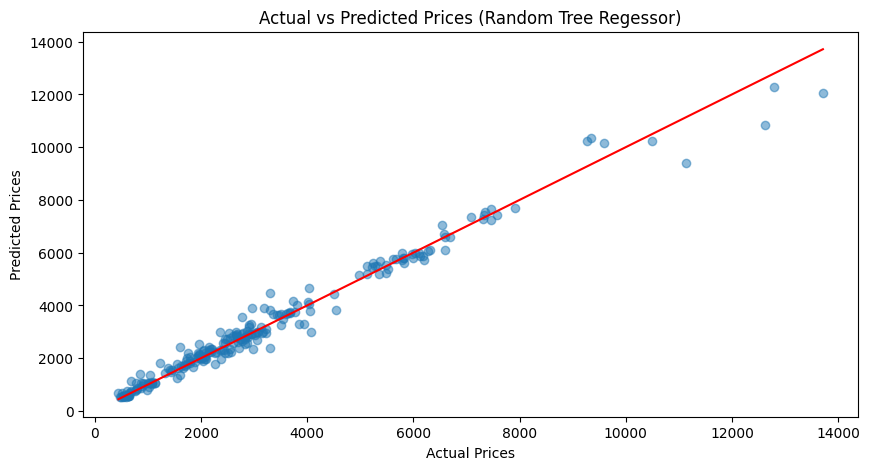

In [ ]:
# Plotting actual vs predicted prices
plt.figure(figsize=(10, 5))
plt.scatter(ytest, y_pred_original, alpha=0.5)
plt.plot([min(ytest), max(ytest)], [min(ytest), max(ytest)], 'r')
plt.title('Actual vs Predicted Prices (Random Tree Regessor)')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()

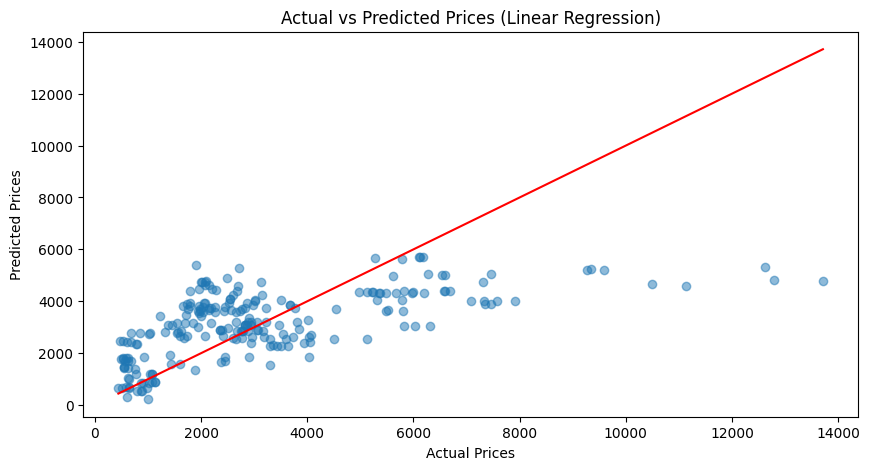

In [ ]:
plt.figure(figsize=(10,5))
plt.scatter(ytest, lm_pred_original, alpha=0.5)
plt.plot([min(ytest), max(ytest)], [min(ytest), max(ytest)], 'r')
plt.title('Actual vs Predicted Prices (Linear Regression)')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()

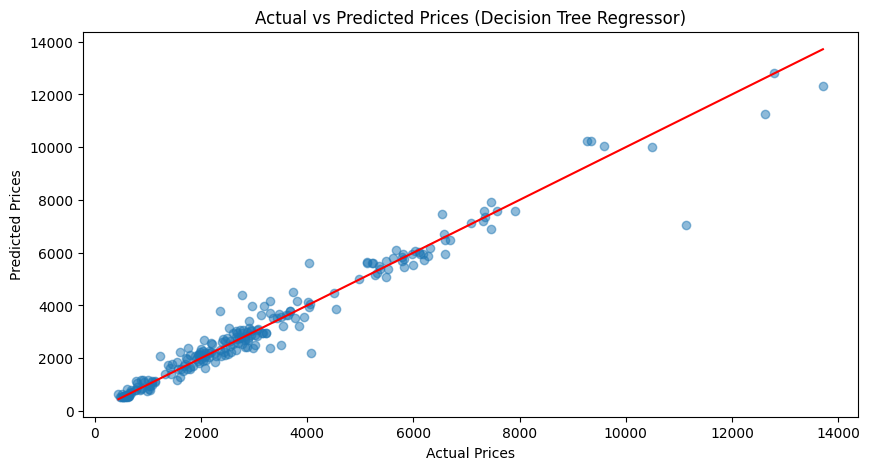

In [ ]:
plt.figure(figsize = (10,5))
plt.scatter(ytest, dt_pred_original, alpha=0.5)
plt.plot([min(ytest), max(ytest)], [min(ytest), max(ytest)], 'r')
plt.title('Actual vs Predicted Prices (Decision Tree Regressor)')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()

In [ ]:
print(f'ytest: {ytest}')
#print(f'y_pred_original: {y_pred_original}')

ytest: 218     1883.0
809     5668.0
501      990.0
649     1683.0
323      539.0
         ...  
361     2444.0
292     2403.0
1083    9266.0
557      796.0
448     1705.0
Name: Price, Length: 229, dtype: float64


# Hyperparameter tuning

In [ ]:
# Initialize models
#linear = LinearRegression()
#decisionTree = DecisionTreeRegressor()
#randomForest = RandomForestRegressor()


In [ ]:
# Hyperparameter tuning using GridSearchCV for Linear Regression
param_grid_linear = {
    'fit_intercept': [True, False],
    #'normalize': [True, False]
}
grid_search = GridSearchCV(estimator=lm, param_grid=param_grid_linear, cv=5, scoring='r2', n_jobs=-1, verbose=2)
grid_search.fit(Xtrain_scaled, ytrain_scaled.ravel())
best_lnr = grid_search.best_estimator_
best_lnr

Fitting 5 folds for each of 2 candidates, totalling 10 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


LinearRegression(fit_intercept=False)

In [ ]:
# Hyperparameter tuning using GridSearchCV for Decision Tree
param_grid_Dtree = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid_Dtree, cv=5, scoring='r2', n_jobs=-1, verbose=2)
grid_search.fit(Xtrain_scaled, ytrain_scaled.ravel())
best_Dtree = grid_search.best_estimator_
best_Dtree

Fitting 5 folds for each of 36 candidates, totalling 180 fits


DecisionTreeRegressor(max_depth=20, min_samples_leaf=4, min_samples_split=5)

In [ ]:
# Hyperparameter tuning using GridSearchCV for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=base_model, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1, verbose=2)
grid_search.fit(Xtrain_scaled, ytrain_scaled.ravel())
best_rf = grid_search.best_estimator_
best_rf

Fitting 5 folds for each of 108 candidates, totalling 540 fits


RandomForestRegressor(max_depth=30, min_samples_leaf=2)

In [ ]:
# Train the models
best_lnr.fit(Xtrain_scaled, ytrain_scaled.ravel())
best_Dtree.fit(Xtrain_scaled, ytrain_scaled.ravel())
best_rf.fit(Xtrain_scaled, ytrain_scaled.ravel())


# Evaluate the models
models = {'Linear Regression': best_lnr, 'Decision Tree': best_Dtree, 'Random Forest': best_rf}

for name, model in models.items():
    y_pred = model.predict(Xtest_scaled) #ytest, y_pred_original
    print(f"Model: {name}")
    print(f"Model Accuracy: {model.score(Xtest_scaled, ytest_scaled)}")
    print(f"MAE: {mean_absolute_error(ytest, y_pred)}")
    print(f"MSE: {mean_squared_error(ytest, y_pred)}")
    print(f"RMSE: {np.sqrt(mean_squared_error(ytest, y_pred))}")
    print(f"R²: {r2_score(ytest, y_pred)}\n")


Model: Linear Regression
Model Accuracy: 0.37969465751196363
MAE: 3149.879474441534
MSE: 15617899.697193487
RMSE: 3951.948847998097
R²: -1.7410672391678488

Model: Decision Tree
Model Accuracy: 0.9731123369856021
MAE: 3149.85539558227
MSE: 15614656.517635768
RMSE: 3951.538500082692
R²: -1.7404980350233248

Model: Random Forest
Model Accuracy: 0.9775575714550696
MAE: 3149.868689715782
MSE: 15614825.32044806
RMSE: 3951.5598591503153
R²: -1.7405276612770226



In [ ]:
best_rf

RandomForestRegressor(max_depth=30, min_samples_leaf=2)

In [ ]:
feature_importances = pd.Series(best_rf.feature_importances_, index=Xtrain.columns).sort_values(ascending=False)
print(feature_importances)

Produce_Variety       0.587290
package_weight(Kg)    0.243008
Commodity_Type        0.108415
Month                 0.031226
Year                  0.026028
Unit                  0.003004
Day                   0.001028
dtype: float64


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.inspection import permutation_importance

# Cross-validation
cv_scores = cross_val_score(best_rf, Xtrain_scaled, ytrain_scaled.ravel(), cv=5)
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean CV score: {cv_scores.mean()}")

feature_names = Xtrain.columns.tolist()

# Feature importance
result = permutation_importance(best_rf, Xtest_scaled, ytest_scaled, n_repeats=10, random_state=42)
for i in result.importances_mean.argsort()[::-1]:
    print(f"{feature_names[i]}: {result.importances_mean[i]:.3f} +/- {result.importances_std[i]:.3f}")

Cross-validation scores: [0.97282757 0.92495161 0.9523873  0.97383434 0.89396155]
Mean CV score: 0.9435924745784174
Produce_Variety: 1.248 +/- 0.159
package_weight(Kg): 0.668 +/- 0.071
Commodity_Type: 0.230 +/- 0.024
Year: 0.055 +/- 0.011
Month: 0.032 +/- 0.016
Unit: 0.002 +/- 0.001
Day: 0.001 +/- 0.000


In [ ]:
feature_names

['Produce_Variety',
 'Commodity_Type',
 'Unit',
 'package_weight(Kg)',
 'Day',
 'Month',
 'Year']

# Passing the Base Models through the Ensemble Learning models.

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

# Gradient Boosting
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(Xtrain_scaled, ytrain_scaled.ravel())
gb_predictions = gb_model.predict(Xtest_scaled)

print("Gradient Boosting Model Performance:")
print(f"Accuracy: {gb_model.score(Xtest_scaled, ytest_scaled)}")
print(f"MAE: {mean_absolute_error(ytest, gb_predictions)}")
print(f"RMSE: {np.sqrt(mean_squared_error(ytest, gb_predictions))}")
print(f"R²: {r2_score(ytest, gb_predictions)}")

# XGBoost
xgb_model = XGBRegressor(random_state=42)
xgb_model.fit(Xtrain_scaled, ytrain_scaled.ravel())
xgb_predictions = xgb_model.predict(Xtest_scaled)

print("\nXGBoost Model Performance:")
print(f"Accuracy: {xgb_model.score(Xtest_scaled, ytest_scaled)}")
print(f"MAE: {mean_absolute_error(ytest, xgb_predictions)}")
print(f"RMSE: {np.sqrt(mean_squared_error(ytest, xgb_predictions))}")
print(f"R²: {r2_score(ytest, xgb_predictions)}")

Gradient Boosting Model Performance:
Accuracy: 0.9494018418850919
MAE: 3149.883159217744
RMSE: 3951.612441409543
R²: -1.7406005965733673

XGBoost Model Performance:
Accuracy: 0.9797294879757867
MAE: 3149.8737726372087
RMSE: 3951.566207389921
R²: -1.7405364666808807


In [ ]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import Ridge

# Define base models
base_models = [
    ('lr', lm),
    ('dt', dt),
    ('rf', best_rf)
]

# Define meta-model
meta_model = Ridge()

# Create stacking ensemble
stacking_model = StackingRegressor(
    estimators=base_models,
    final_estimator=meta_model,
    cv=5  # Number of folds for cross-validated predictions
)

# Train the stacking ensemble
stacking_model.fit(Xtrain_scaled, ytrain_scaled.ravel())

# Make predictions
stacking_predictions = stacking_model.predict(Xtest_scaled)

# Evaluate the stacking ensemble
print("Stacking Ensemble Model Performance:")
print(f"Accuracy: {stacking_model.score(Xtest_scaled, ytest_scaled)}")
print(f"MAE: {mean_absolute_error(ytest, stacking_predictions)}")
print(f"MSE: {mean_squared_error(ytest, stacking_predictions)}")
print(f"RMSE: {np.sqrt(mean_squared_error(ytest, stacking_predictions))}")
print(f"R²: {r2_score(ytest, stacking_predictions)}")

Stacking Ensemble Model Performance:
Accuracy: 0.9780857640146834
MAE: 3149.8707720601965
MSE: 15614823.217377434
RMSE: 3951.5595930439204
R²: -1.740527292171182


In [ ]:
from sklearn.ensemble import VotingRegressor

#assuming you have already trained linear, decisionTree, and best_rf models
ensemble_model = VotingRegressor(
    estimators=[
        ('lr', lm),
        ('dt', dt),
        ('rf', best_rf)
    ]
)

# Train the ensemble
ensemble_model.fit(Xtrain_scaled, ytrain_scaled.ravel())

# Make predictions
ensemble_predictions = ensemble_model.predict(Xtest_scaled)

# Evaluate the ensemble
print("Ensemble Model Performance:")
print(f"Accuracy: {ensemble_model.score(Xtest_scaled, ytest_scaled)}")
print(f"MAE: {mean_absolute_error(ytest, ensemble_predictions)}")
print(f"MSE: {mean_squared_error(ytest, ensemble_predictions)}")
print(f"RMSE: {np.sqrt(mean_squared_error(ytest, ensemble_predictions))}")
print(f"R²: {r2_score(ytest, ensemble_predictions)}")

Ensemble Model Performance:
Accuracy: 0.9022701941109064
MAE: 3149.8753528622788
MSE: 15615884.320072811
RMSE: 3951.6938545480484
R²: -1.7407135242441294


In [ ]:
def weighted_average_ensemble(models, weights, X):
    predictions = np.column_stack([model.predict(X) for model in models])
    return np.average(predictions, axis=1, weights=weights)

#assign weights based on R² scores (you might want to use a different metric)
total_r2 = sum([r2_score(ytest, model.predict(Xtest_scaled)) for model in models.values()])
weights = [r2_score(ytest, model.predict(Xtest_scaled)) / total_r2 for model in models.values()]

# Make predictions
weighted_predictions = weighted_average_ensemble(list(models.values()), weights, Xtest_scaled)

print("Weighted Average Ensemble Performance:")
print(f"MAE: {mean_absolute_error(ytest, weighted_predictions)}")
print(f"MSE: {mean_squared_error(ytest, weighted_predictions)}")
print(f"RMSE: {np.sqrt(mean_squared_error(ytest, weighted_predictions))}")
print(f"R²: {r2_score(ytest, weighted_predictions)}")

Weighted Average Ensemble Performance:
MAE: 3149.867854517976
MSE: 15615793.936339125
RMSE: 3951.6824184566153
R²: -1.7406976611705942


# building a deep learning model

Long-short term memory

In [ ]:
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(Xtrain_scaled.shape[1], 1)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1, activation='linear'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mae'])

In [ ]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                        │ (None, 7, 50)               │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 30,651 (119.73 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.fit(Xtrain_scaled.reshape(Xtrain_scaled.shape[0], Xtrain_scaled.shape[1], 1), ytrain_scaled, epochs=30, batch_size=32)

Epoch 1/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 7s 24ms/step - loss: 0.9903 - mae: 0.7185
Epoch 2/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.8837 - mae: 0.6609
Epoch 3/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.8577 - mae: 0.6602
Epoch 4/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.8894 - mae: 0.6476
Epoch 5/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.6832 - mae: 0.5985
Epoch 6/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.5579 - mae: 0.5484
Epoch 7/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.5605 - mae: 0.5421
Epoch 8/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.5740 - mae: 0.5479
Epoch 9/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.4498 - mae: 0.4958
Epoch 10/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.3744 - mae: 0.4649
Epoch 11/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.3712 - mae: 0.4357
Epoch 12/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.3572 - mae: 0.4296
Epoch 13/30
29/29 ━━━━━━━━━━━━━━━━━━━

In [ ]:
Xtrain_scaled.shape

(916, 7)

Optimized  lstm

In [ ]:
# Train LSTM model
model.fit(Xtrain_scaled.reshape(Xtrain_scaled.shape[0],Xtrain_scaled.shape[1],1),ytrain_scaled,epochs=100,batch_size=32,validation_split=0.1,verbose=1,validation_data=(Xtest_scaled.reshape(Xtest_scaled.shape[0],Xtest_scaled.shape[1],1),ytest_scaled))

Epoch 1/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - loss: 0.1910 - mae: 0.2991 - val_loss: 0.1487 - val_mae: 0.2650
Epoch 2/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.2020 - mae: 0.2999 - val_loss: 0.1537 - val_mae: 0.2818
Epoch 3/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.1820 - mae: 0.3023 - val_loss: 0.1695 - val_mae: 0.2706
Epoch 4/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.1809 - mae: 0.2833 - val_loss: 0.1463 - val_mae: 0.2646
Epoch 5/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.1524 - mae: 0.2685 - val_loss: 0.1822 - val_mae: 0.3183
Epoch 6/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.1849 - mae: 0.3102 - val_loss: 0.1476 - val_mae: 0.2559
Epoch 7/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.1665 - mae: 0.2762 - val_loss: 0.1661 - val_mae: 0.2752
Epoch 8/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.1943 - mae: 0.3001 - val_loss: 0.1649 - val_mae: 0.2691
Epoch 9/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - lo

In [ ]:
model.evaluate(Xtest_scaled.reshape(Xtest_scaled.shape[0],Xtest_scaled.shape[1],1),ytest_scaled)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0805 - mae: 0.1860 


[0.08145231008529663, 0.18498162925243378]

making prediction

In [ ]:
lstm_predScaled = model.predict(Xtest_scaled.reshape(Xtest_scaled.shape[0],Xtest_scaled.shape[1],1))
lstm_pred = scaler_y.inverse_transform(lstm_predScaled)

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step


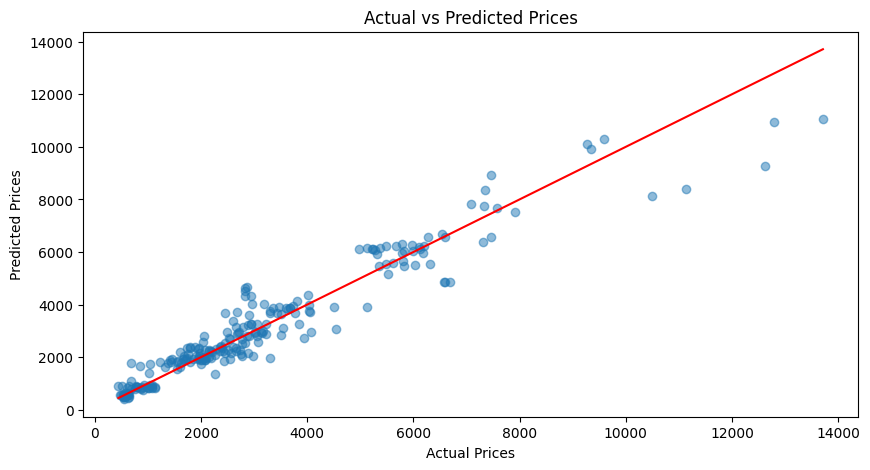

In [ ]:
# Plotting actual vs predicted prices
plt.figure(figsize=(10, 5))
plt.scatter(ytest, lstm_pred, alpha=0.5)
plt.plot([min(ytest), max(ytest)], [min(ytest), max(ytest)], 'r')
plt.title('Actual vs Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()

CNN

In [ ]:
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten

In [ ]:
cnn_model = Sequential()
cnn_model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(Xtrain_scaled.shape[1], 1)))
cnn_model.add(MaxPooling1D(pool_size=2))
cnn_model.add(Flatten())
cnn_model.add(Dense(1, activation='linear'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
cnn_model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mae'])

In [ ]:
cnn_model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_1 (Conv1D)                    │ (None, 5, 64)               │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ (None, 2, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 385 (1.50 KB)

 Trainable params: 385 (1.50 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
cnn_model.fit(Xtrain_scaled.reshape(Xtrain_scaled.shape[0], Xtrain_scaled.shape[1], 1), ytrain_scaled, epochs=100, batch_size=32, validation_split=0.1, verbose=1, validation_data=(Xtest_scaled.reshape(Xtest_scaled.shape[0], Xtest_scaled.shape[1], 1), ytest_scaled))

Epoch 1/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 1.0449 - mae: 0.6646 - val_loss: 0.7555 - val_mae: 0.6114
Epoch 2/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.7662 - mae: 0.6061 - val_loss: 0.6486 - val_mae: 0.5580
Epoch 3/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.7541 - mae: 0.6080 - val_loss: 0.6031 - val_mae: 0.5392
Epoch 4/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5838 - mae: 0.5541 - val_loss: 0.5763 - val_mae: 0.5257
Epoch 5/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6464 - mae: 0.5607 - val_loss: 0.5572 - val_mae: 0.5092
Epoch 6/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6479 - mae: 0.5516 - val_loss: 0.5349 - val_mae: 0.5028
Epoch 7/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6174 - mae: 0.5504 - val_loss: 0.5202 - val_mae: 0.4949
Epoch 8/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5270 - mae: 0.5029 - val_loss: 0.4963 - val_mae: 0.4778
Epoch 9/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.56

In [ ]:
cnn_model.evaluate(Xtest_scaled.reshape(Xtest_scaled.shape[0],Xtest_scaled.shape[1],1),ytest_scaled)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1307 - mae: 0.2492 


[0.13181546330451965, 0.2504652738571167]

In [ ]:
cnn_pred = cnn_model.predict(Xtest_scaled.reshape(Xtest_scaled.shape[0],Xtest_scaled.shape[1],1))

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


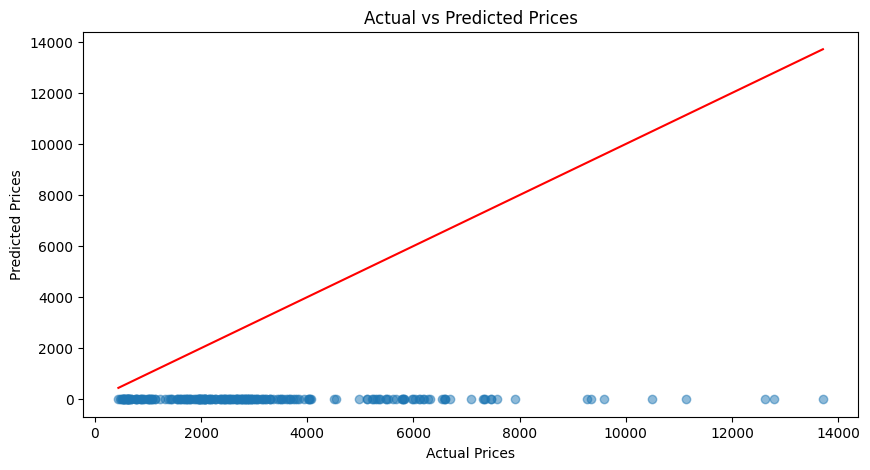

In [ ]:
#Plotting predicted and actual prices
plt.figure(figsize=(10,5))
plt.scatter(ytest, cnn_pred, alpha=0.5)
plt.plot([min(ytest), max(ytest)], [min(ytest), max(ytest)], 'r')
plt.title('Actual vs Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()

In [ ]:
import joblib
joblib.dump(xgb_model, "base_model.sav")


['base_model.sav']

In [ ]:
data = {}
feature_values = ['Ext Bag', 140, '15/3/2013', 'Horticulture', 'Rice', 2, 140, 15, 3, 2013]

for feature_name, feature_value in zip(feature_names, feature_values):
    data[feature_name] = feature_value
data

{'Produce_Variety': 'Ext Bag',
 'Commodity_Type': 140,
 'Unit': '15/3/2013',
 'package_weight(Kg)': 'Horticulture',
 'Day': 'Rice',
 'Month': 2,
 'Year': 140}

In [ ]:
!pip install requests

In [ ]:
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from datetime import datetime

#function to get user input
def get_user_input():
    feature_values = {}
    feature_values['Produce_Variety'] = input("Enter Produce Variety (e.g., Horticulture): ")
    feature_values['Commodity_Type'] = input("Enter Commodity Type (e.g., Tomatoes): ")
    feature_values['Unit'] = input("Enter Unit (e.g., Lg Box): ")
    feature_values['Date'] = input("Enter Date (DD/MM/YYYY): ")
    feature_values['package_weight(Kg)'] = float(input("Enter Package Weight in Kg: "))
    #feature_values['Price'] = float(input("Enter the Total commodity Price in Kenyan Shillings (Ksh): "))


    # Convert the input date to a Unix timestamp
    date_obj = datetime.strptime(feature_values['Date'], '%d/%m/%Y')
    feature_values['Date_Timestamp'] = int(date_obj.timestamp())
    feature_values['Day'] = date_obj.day
    feature_values['Month'] = date_obj.month
    feature_values['Year'] = date_obj.year
    feature_values.pop('Date')
    feature_values.pop('Date_Timestamp')


    return feature_values

#getting user input
user_features = get_user_input()


#Separate numerical and categorical features
numerical_features = [
    user_features['package_weight(Kg)'],
    user_features['Day'],
    user_features['Month'],
    user_features['Year'],
    # user_features['Date_Timestamp']
    #user_features['Price']
]

categorical_features = [
    user_features['Produce_Variety'],
    user_features['Commodity_Type'],
    user_features['Unit']
]

#encode categorical features
encoder = OneHotEncoder(handle_unknown='ignore')
encoded_categorical = encoder.fit_transform([categorical_features]).toarray()
input_data = np.concatenate((numerical_features, encoded_categorical.flatten()))
input_data = np.array(input_data).reshape(1, -1)

KeyboardInterrupt: Interrupted by user

In [ ]:
# Scale input data
scaler = StandardScaler()
input_data = scaler.fit_transform(input_data)

# Predict the price
predicted_price = best_rf.predict(input_data) * 100
print(f"Predicted Price: {predicted_price}")

In [ ]:
import datetime
from datetime import datetime
feature_values = {'Volume_in_Kgs': 126, 'Type_of_Commodity':5, 'Package_Type':2, 'package_weight(Kg)':126, 'Price':2205, 'Produce_Variety': 'Horticulture', 'Commodity_Type': 'Tomatoes', 'Unit': 'Lg Box', 'Date': '01/01/2023'}
numeric_fields = ['Volume_in_Kgs', 'Type_of_Commodity', 'Package_Type', 'package_weight(Kg)', 'Price']
for key in numeric_fields:
  feature_values[key] = float(feature_values[key])
  print(feature_values[key])

categorical = ['Produce_Variety', 'Commodity_Type', 'Unit']
for key in categorical:
    feature_values[key] = str(feature_values[key])
    print(feature_values[key])
#  ['Produce_Variety', 'Commodity_Type', 'Unit', 'Volume_in_Kgs', 'Date', 'Type_of_Commodity', 'Package_Type', 'package_weight(Kg)', 'Price']:


# Convert the input date to a Unix timestamp
date_obj = datetime.strptime(feature_values['Date'], '%d/%m/%Y')
# feature_values['Date_Timestamp'] = int(date_obj.timestamp())
feature_values['Day'] = date_obj.day
feature_values['Month'] = date_obj.month
feature_values['Year'] = date_obj.year
feature_values.pop('Date')

feature_values

In [ ]:
import numpy as np
import requests
import json
from sklearn.preprocessing import OneHotEncoder
from datetime import datetime
from sklearn.preprocessing import StandardScaler

def user_input_transformer(features):

    # Separate numerical and categorical features
    numerical_features = [
        features['Volume_in_Kgs'],
        features['Type_of_Commodity'],
        features['Package_Type'],
        features['package_weight(Kg)'],
        features['Day'],
        features['Month'],
        features['Year'],
        features['Price']
    ]

    categorical_features = [
        features['Produce_Variety'],
        features['Commodity_Type'],
        features['Unit']
    ]

    # One-hot encode categorical features
    encoder = OneHotEncoder(handle_unknown='ignore')
    encoded_categorical = encoder.fit_transform([categorical_features]).toarray()

    # Combine numerical and encoded categorical features
    input_data = np.concatenate((numerical_features, encoded_categorical.flatten()))

    # Reshape the input data to a 2D array
    input_data = np.array(input_data).reshape(1, -1)
    return input_data

In [ ]:
user_input_transformer(feature_values)

In [ ]:
import joblib
